## Introduction
Hello, and welcome to this lesson on univariate statistical tests for feature selection in machine learning. The efficient handling of dataset features can drastically impact your machine learning model's performance. We strive to improve our model's accuracy, reduce overfitting, and lessen the training time by intelligently choosing the most relevant features. In the journey to achieve this, we will encounter a dominant concept known as univariate selection for feature selection. We will apply SelectKBest to select the most informative features from our dataset. By the end of this session, you will grasp how to use univariate feature selection in Python and appreciate its strengths and limitations.

## Univariate Statistical Tests for Feature Selection
Univariate statistical tests examine each feature independently to determine the strength of the relationship between the feature and the response variable. These tests are simple to run and understand and often provide good intuition about your features. The scikit-learn library provides the SelectKBest class, which uses a set of statistical tests to select a specific number of features.

The SelectKBest class simply retains the first 'k' features of X with the highest scores. In this lesson, we'll use the chi-squared statistical test for non-negative features to select ‘k’ best features. The chi-square test is used to determine whether there's a significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

## Loading Dataset for Feature Selection
We'll use the Iris dataset from Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, as the dataset for this tutorial. The Iris dataset is one of the datasets scikit-learn comes with that do not require the downloading of any file from some external website. It's a beginner-friendly dataset that contains measurements for 150 iris flowers from three different species.

The dataset contains five attributes - sepal length, sepal width, petal length, petal width, and species. Species is our target variable, while the rest measure particular characteristics (features) of individual Iris flowers.

Here's how you load the dataset:

In [1]:
from sklearn.datasets import load_iris

# Loading the dataset
iris = load_iris()
X, y = iris.data, iris.target

print(X.shape, y.shape) # (150, 4) (150,)

(150, 4) (150,)


This output indicates that our dataset has 150 samples, each with 4 feature variables, and 150 target values representing the species of each Iris plant.

load_iris() is a function that returns a data object. We then unpack this object into our features (X) and classes (y).

## Implementing Univariate Feature Selection with Scikit-learn's SelectKBest
Selecting features using the chi-square statistical test in scikit-learn involves the following steps:

Feature Selection: We use the chi-square statistical test for non-negative features to select k best features from the Iris dataset. The SelectKBest class is used to choose those features, with k=2 indicating that we would like to select the top 2 features that are most related to the output variable.

Fit the Model: Now that we have our SelectKBest instance, we can train (fit) it on our dataset.

Get Selected Features: Once the model is trained, we can use the get_support method to retrieve a mask of the selected features.

Print Selected Features' Scores: Finally, we want to visually inspect the scores of our selected features. Here's how you implement this:

In [2]:
from sklearn.feature_selection import SelectKBest, chi2

# Performing feature selection
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

# Print the index of selected features and their scores
selected_features = selector.get_support(indices=True)
scores = selector.scores_

print("Selected Features: ", selected_features) # [2 3]
print("Scores: ", scores) # [ 10.81782088 3.7107283 116.31261309 67.0483602 ]

Selected Features:  [2 3]
Scores:  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]


This output reveals that features at index positions 2 and 3 (petal length and petal width) have the highest chi-square scores and are thus selected as the most relevant features for our prediction model.

Understanding chi-square Scores
The chi-square statistic is used to determine the strength of the relationship between the variables. A higher chi-square statistic indicates a stronger relationship.

The chi-square test statistic is calculated as follows:

Calculate the Expected Frequency: The expected frequency is the frequency that we would expect to see in each category if the null hypothesis were true. It's calculated as the row total multiplied by the column total and divided by the total number of observations. Here, null hypothesis refers to the assumption that there's no relationship between the variables.
Calculate the Chi-Square Statistic: The chi-square statistic is calculated as the sum of the squared difference between the observed and expected frequencies divided by the expected frequency. Mathematically, the chi-square statistic is calculated as:
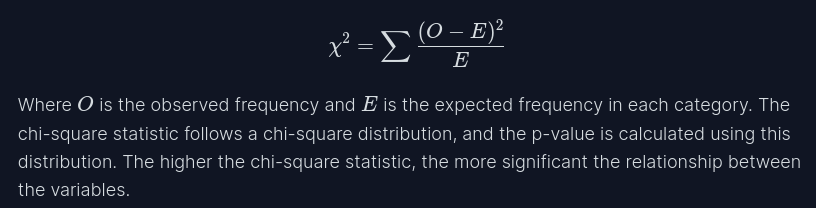

## Understanding the p-value
While the chi-square scores indicate the strength of the relationship between the variables, the p-value is used to determine the significance of the relationship. The p-value is a measure of the probability that an observed difference could have occurred just by random chance. A lower p-value indicates a more significant relationship between the variables.

The p-value is calculated using the chi-square distribution. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there's a significant relationship between the variables. We calculate the p-value using the chi2 distribution in Python:

In [3]:
from scipy.stats import chi2

p_values = chi2.sf(scores, 1)
print("P-values: ", p_values) # [1.00527740e-03 5.40637961e-02 4.05982042e-27 2.64927865e-16]

P-values:  [1.00527740e-03 5.40637961e-02 4.05982042e-27 2.64927865e-16]


We can interpret the p-values as follows:

- The p-value for petal length is 1.00527740e-03, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that there's a significant relationship between petal length and the target variable.
- The p-value for petal width is 5.40637961e-02, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there's no significant relationship between petal width and the target variable.
- The p-values for sepal length and sepal width are 4.05982042e-27 and 2.64927865e-16, respectively. Both are less than 0.05, indicating a significant relationship between these features and the target variable.

While the chi-square scores indicate the strength of the relationship between the variables, the p-values indicate the significance of the relationship. A high chi-square score doesn't necessarily mean a significant relationship if the p-value is high. Therefore, it's essential to consider both the chi-square scores and p-values when interpreting the results.

## Discussing the Limitations of Univariate Feature Selection
While Univariate Feature Selection is an excellent way to filter out irrelevant features, it's important to be aware of its limitations:

It exhibits a considerable limitation in handling negative input values, as the chi-square test is founded on the premise of categorical data or frequency counts.
It may result in selecting multiple heavily correlated features because it treats each feature independently.
It doesn't consider the relationship between features, which may lead to the selection of redundant features.
Understanding these limitations can guide your decision-making when choosing the most suitable feature selection technique for your particular dataset.

## Lesson Summary and Introduction to Practice Exercises
Today, we learned about the power of univariate feature selection and how it improves the effectiveness and efficiency of our machine learning models. We delved into the concept of univariate selection and examined how to implement it using scikit-learn's SelectKBest function to select the most informative features.

However, keep in mind the technique's limitations—it can't handle negative input values and may select heavily correlated features.

The best way to solidify the concepts you've learned in this lesson is through practice. So, let's proceed to some exercises that will allow you to implement univariate feature selection on various datasets. This critical practice will prepare you for more advanced feature selection and dimensionality reduction techniques in future lessons. Onwards!




## Unveiling the Most Informative Features with Chi-Square Test

Well done on learning about univariate feature selection with SelectKBest. Now, can you use your knowledge to determine which features from the Iris dataset are most relevant for classifying the species? The given code will load the Iris dataset and apply the chi-square test to select the top two features. Just click Run to reveal the mystery!

In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Loading the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Performing feature selection with chi-square test
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

# Print the index of selected features and their scores
selected_features = selector.get_support(indices=True)
scores = selector.scores_

print("Selected Features:", selected_features)
print("Scores:", scores)

Selected Features: [2 3]
Scores: [ 10.81782088   3.7107283  116.31261309  67.0483602 ]


## Expanding Our Feature Universe

You're doing fantastic, Space Explorer! Now, flex your feature-selection muscles by tweaking our prior code. Change the number of top features selected from the Iris dataset. Experiment with selecting 3 features instead of 2. It's time to put your knowledge into orbit and see how this small alteration impacts our selection of the most informative features!

In [5]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Loading the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Performing feature selection using univariate statistical test - chi-square
# INFO: Update the logic to select 2 the 3 most important features insted
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)

# Getting the index positions of the selected features and their respective scores
selected_features = selector.get_support(indices=True)
scores = selector.scores_

# Displaying the selected features and their scores
print("Selected Features: ", selected_features)
print("Scores: ", scores)

Selected Features:  [0 2 3]
Scores:  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]


## Uncovering the Stars: Selecting Features with Chi-Square

Great, you've observed how to filter space dust (features) using a powerful mathematical tool. Now, it's time to apply this knowledge. Your task is to use a chi-square test to select the top features that have the strongest relationship with the target variable. Remember how we arrived at those two shiniest stars among the features?

In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Perform feature selection using the univariate selection method to find the top 2 features
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

# Retrieve and print the indices of the selected features and their chi-square scores
selected_indices = selector.get_support(indices=True)
selected_scores = selector.scores_[selected_indices]

print("Selected feature indices: ", selected_indices)
print("Chi-square scores of selected features: ", selected_scores)

Selected feature indices:  [2 3]
Chi-square scores of selected features:  [116.31261309  67.0483602 ]


## Implementing SelectKBest for Feature Selection

You're doing phenomenally, Space Voyager! Now, let's dive into the essence of feature selection. Can you determine which line of code is crucial for applying the SelectKBest method to select the top k features? Write the line of code from scratch that will bring our feature selection to life!

In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import chi2 as sp_chi2

# Loading the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Applying the SelectKBest method to perform feature selection and fitting the data to the selector
selector = SelectKBest(score_func=chi2, k=2)
selector.fit(X, y)

# Availability of the new features
selected_features = selector.get_support(indices=True)
scores = selector.scores_

# Calculating p-values using the chi-square distribution
p_values = sp_chi2.sf(scores, df=1)

# Output the results
print("Selected Features:", selected_features)
print("Scores:", scores)
print("P-values:", p_values)


Selected Features: [2 3]
Scores: [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
P-values: [1.00527740e-03 5.40637961e-02 4.05982042e-27 2.64927865e-16]
